<a href="https://colab.research.google.com/github/abdifatahmain/dataVIZ/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("vgsales.csv", encoding='ISO-8859-1')

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Source of dataset: https://www.kaggle.com/datasets/gregorut/videogamesales

In [ ]:
# Data Preprocessing

# 1. Handling Missing Values:
# Check for missing values
print(df.isnull().sum())
len(df)

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


16598

In [ ]:
# Since 'Year' has missing values and is crucial, we'll impute them.
df['Publisher'] = df['Publisher'].fillna(df['Publisher'].mode()[0])

print(df.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


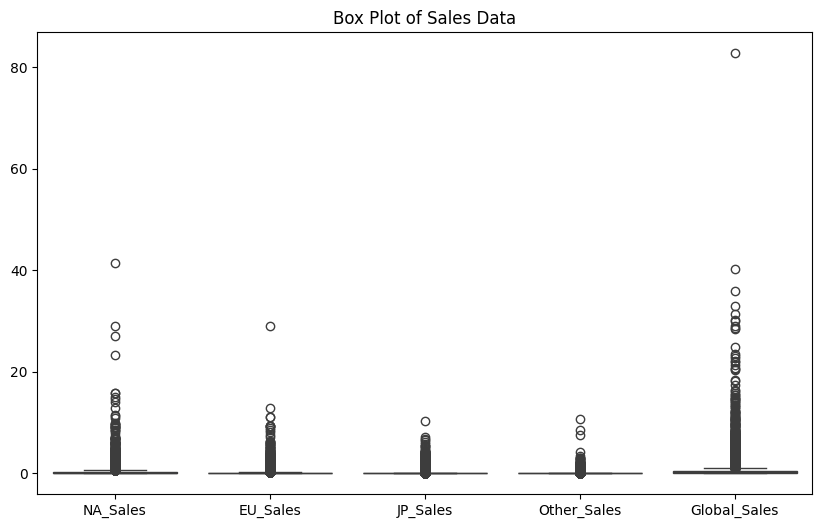

In [ ]:
# 2. Handling Outliers:
# We'll focus on sales data.  Box plots are helpful for visualizing outliers.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
plt.title('Box Plot of Sales Data')
plt.show()

In [ ]:
# Outlier treatment
# cap outliers at the 99th percentile.
for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
    upper_bound = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [ ]:
# 3. Handling Non-Standardised Data:
#  columns (like 'Genre' and 'Publisher').
print(df['Genre'].unique())
print(df['Publisher'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'Valve Software' 'ASCII Entertainment' 'Mindscape'
 'Info

EDA AND VISUALISATION

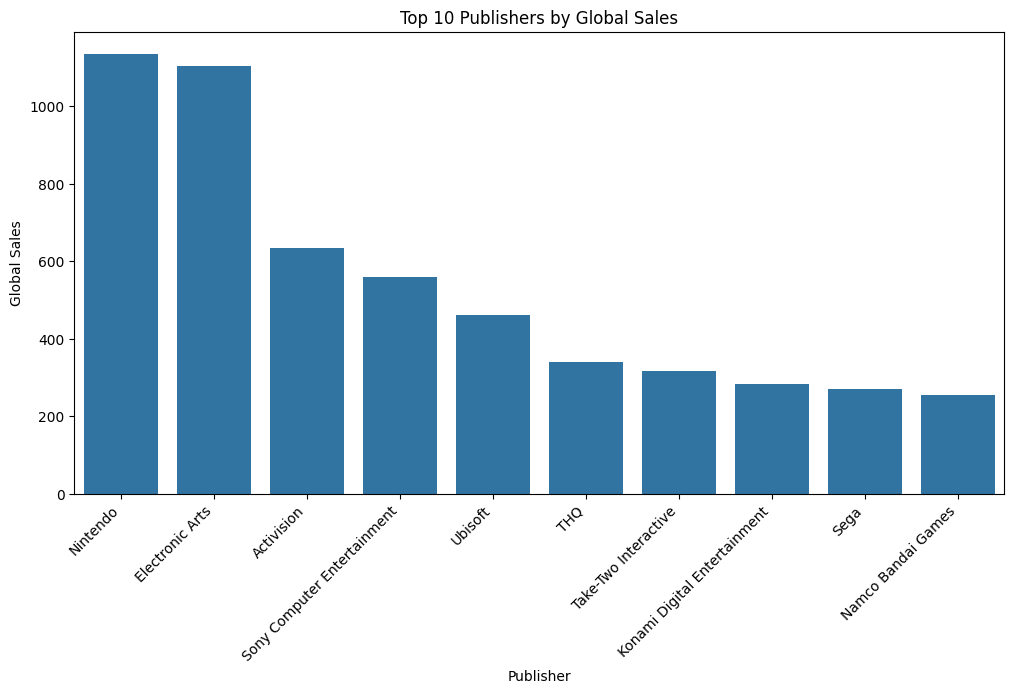

In [ ]:
# Exploratory Data Analysis (EDA) and Visualisation

# 1. Top 10 Publishers:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.show()


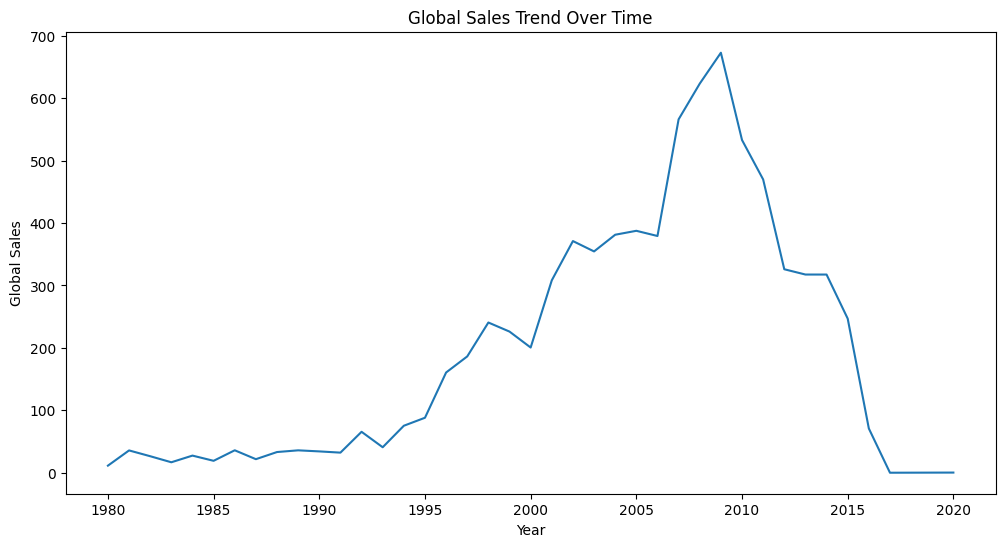

In [ ]:
# 2. Sales Trend Over Time:
sales_by_year = df.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values)
plt.title('Global Sales Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show()


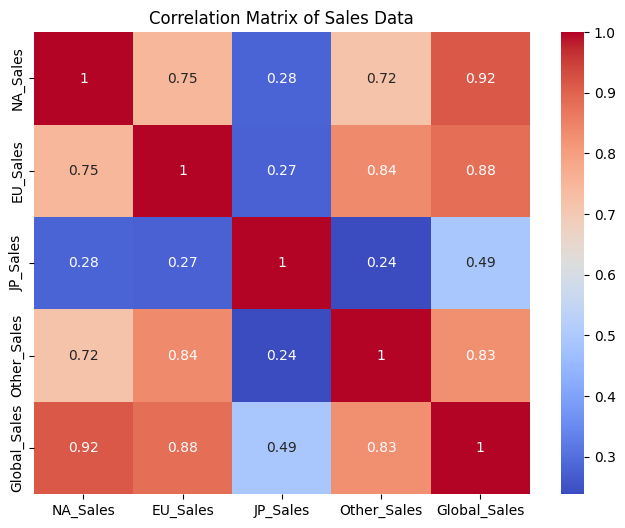

In [ ]:
# 3. Correlation Matrix:
correlation_matrix = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sales Data')
plt.show()

In [ ]:
# Save the cleaned DataFrame to a new CSV file.
df.to_csv('vgsales_cleaned.csv', index=False)

print("Data preprocessing and EDA completed. Cleaned data saved to 'vgsales_cleaned.csv'")

Data preprocessing and EDA completed. Cleaned data saved to 'vgsales_cleaned.csv'
